In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
import os
import pdb
import numpy as np
import numpy.random as npr
import tensorflow as tf
import sys
from scipy import linalg as LA
import datetime
import re
import json

import getpass
ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
    PATH_NET = os.path.join(p,'code/multitask-nets/continuous_tasks')
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'
    PATH_NET = os.path.join(p,'code/multitask-nets/continuous_tasks')
elif ui == 'lndrisco':
    p = '/home/users/lndrisco'
    PATH_NET = os.path.join(p,'code/multitask-nets/continuous_tasks')

sys.path.insert(0, PATH_NET)

from task import generate_trials, rule_name, rule_index_map, rules_dict
from network import Model
from tools_lnd import name_best_ckpt, gen_trials_from_model_dir, get_stim_cats
from task import generate_trials, rule_name
import tools
import imageio


def load_X_from_model_dir(model_dir,rule, mode = 'test',noise = False,alpha_mod1 = 0):    
    model = Model(model_dir)
    with tf.Session() as sess:
        model.restore()
        hparams = model.hp
#         hparams['sigma_x'] = noise_level
        trial = generate_trials(rule, hparams, mode=mode, batch_size = 20, noise_on=noise, delay_fac =1,alpha_mod1 = alpha_mod1)
        feed_dict = tools.gen_feed_dict(model, trial, hparams)
        h_tf, y_hat = sess.run([model.h, model.y_hat], feed_dict=feed_dict) #(n_time, n_condition, n_neuron)
            
    return h_tf, y_hat, hparams, trial

def plot_epoch_division(trial):
    new_keys = ['fix','stim','go']
    r=0
    for e in trial.epochs.keys():
        plt.text(10*np.max([trial.epochs[e][0],0])+20,-.75,new_keys[r],rotation = 0)
        if trial.epochs[e][1]>0:
            plt.plot([10*(trial.epochs[e][1]-1),10*(trial.epochs[e][1]-1)],[-1.8,1.8],':k',linewidth = 2,alpha = .5)
        r+=1
    plt.ylim((-3,3))
    
def plot_epoch_division_nolabel(trial):
    new_keys = ['fix','stim','go']
    r=0
    for e in trial.epochs.keys():
#         plt.text(10*np.max([trial.epochs[e][0],0])+20,-.75,new_keys[r],rotation = 0)
        if trial.epochs[e][1]>0:
            plt.plot([10*(trial.epochs[e][1]-1),10*(trial.epochs[e][1]-1)],[-1.8,1.8],':k',linewidth = 2,alpha = .5)
        r+=1
    plt.ylim((-3,3))
    

rule = 'fdanti'
dir_specific_all = 'crystals/softplus/int20'#vary_inputs_w_alpha
m = os.path.join(p,'data/rnn/multitask/stepnet/crystals/softplus/single_tasks/l2w0001/',rule,str(0))
    
model_dir_all = m

task_list = ['fdgo', 'reactgo', 'delaygo', 'fdanti', 'reactanti', 'delayanti',
              'delaydm1', 'delaydm2', 'contextdelaydm1', 'contextdelaydm2', 'multidelaydm',
              'dmsgo', 'dmsnogo', 'dmcgo', 'dmcnogo']

rule_set_names = ['DelayGo', 'ReactGo', 'MemoryGo', 'DelayAnti', 'ReactAnti', 'MemoryAnti',
              'Decison1', 'Decison2', 'ContextDecison1', 'ContextDecison2', 'MultiDecison',
              'DelayDecison1', 'DelayDecison2', 'ContextDelayDecison1', 'ContextDelayDecison2', 'MultiDelayDecison',
              'DelayMatch2SampleGo', 'DelayMatch2SampleNogo', 'DelayMatch2CategoryGo', 'DelayMatch2CategoryNoGo']


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/single_tasks/l2w0001/fdanti/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/single_tasks/l2w0001/fdanti/0/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/mult

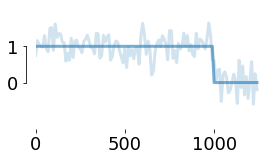

In [81]:
cmap=plt.get_cmap('terrain')
plt.rcParams.update({'font.size': 18})
a = .6
nc = 2
nr = 3
t = 0
lw = 3
# box_anchor = [0,0]
n = True
# stim_labels = ['Mod1 sin ${\Theta}$','Mod1 cos ${\Theta}$','Mod2 sin ${\Theta}$','Mod2 cos ${\Theta}$']
# loc = 'upper right'
        
rule = 'delaygo'

h, y_hat, hparams, trial_n = load_X_from_model_dir(model_dir_all,rule,noise = True)

stim_in = hparams['n_eachring']*hparams['num_ring']

fig, ax1 = plt.subplots(1,1,figsize=(4,2.),gridspec_kw={'hspace': 0, 'wspace': 0})
    
ax1.plot(range(0,np.shape(trial_n.x)[0]*10,10),trial_n.x[:,t,0], alpha = a/3, linewidth = lw)

h, _, _, trial_f = load_X_from_model_dir(model_dir_all,rule,noise = False)

ax1.plot(range(0,np.shape(trial_f.x)[0]*10,10),trial_f.x[:,t,0], 'C0', alpha = a, linewidth = lw)

t_len = 10*np.shape(trial_f.x)[0]


# plt.legend(('Fixation',),bbox_to_anchor=(-.2, 1),frameon=False,handlelength=1)
# plt.xticks([])
# ax1.set_title('Input Unit Activations \n : Fixation Input')
  
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False) 
#     ax2.spines["left"].set_visible(False) 


ax1.spines['left'].set_position(('outward', 10))
ax1.spines['bottom'].set_position(('outward', 10))

ax1.spines['left'].set_bounds(0, 1)
ax1.set_xlim([0,t_len])   

# plot_epoch_division_nolabel(trial_f)
plt.ylim((-1,2))
plt.yticks((0,1))

# plt.tight_layout()

p_figpath = '/Users/lauradriscoll/Documents/code/overleaf/task_schematic_multitask/single_tasks'
figpath = os.path.join(p_figpath,'noise_'+str(n))
figname = 'fixation_'+rule+'.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname),bbox_inches='tight')

plt.show()

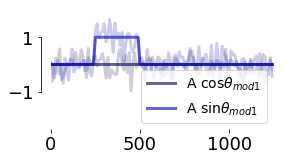

In [82]:
fig, ax2 = plt.subplots(1,1,figsize=(4,2.),gridspec_kw={'hspace': 0, 'wspace': 0})
cmap=plt.get_cmap('seismic')
big_stim_in = stim_in+3
c_set = np.arange(0,1,1/big_stim_in)
c_set = np.concatenate((c_set[:int(stim_in/2)],c_set[big_stim_in:int(big_stim_in/2):-1]),axis = 0)
labels = [r'A cos$\theta_{mod1}$',r'A sin$\theta_{mod1}$']
for l in range(2):
    plt.plot(range(0,np.shape(trial_n.x)[0]*10,10),trial_n.x[:,t,1+l], alpha = a/3, linewidth = lw,c = cmap(c_set[l]))#,c = cmap(c_set[l])
    plt.plot(range(0,np.shape(trial_f.x)[0]*10,10),trial_f.x[:,t,1+l], alpha = a, linewidth = lw,c = cmap(c_set[l]),label = labels[l])#,c = cmap(c_set[l])

    # plt.legend((stim_labels),bbox_to_anchor=(-.2, 1),frameon=False,handlelength=1)
# plt.title(' : Stimulus Input')

ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False) 
#     ax2.spines["left"].set_visible(False) 

ax2.spines['left'].set_position(('outward', 10))
ax2.spines['bottom'].set_position(('outward', 10))

ax2.set_xlim([0,t_len])        
ax2.spines['bottom'].set_bounds(0, t_len)

# plot_epoch_division_nolabel(trial_f)
ax2.spines['left'].set_bounds(-1, 1)
plt.ylim(-2,2)
plt.yticks((-1,1))
plt.legend(fontsize = 14,loc = 4, bbox_to_anchor=(1, -.1))
#     plt.yticks([])
# plt.xticks([])

figpath = os.path.join(p_figpath,'noise_'+str(n))
figname = 'stimulus_m1_' + rule+'.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname),bbox_inches='tight')

plt.show()

In [17]:
os.path.join(figpath,figname)

'/Users/lauradriscoll/Documents/code/overleaf/task_schematic_multitask/single_tasks/noise_True/stimulus_m1_delayanti.pdf'

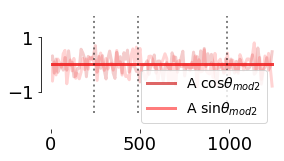

In [18]:
fig, ax2 = plt.subplots(1,1,figsize=(4,2.),gridspec_kw={'hspace': 0, 'wspace': 0})
cmap=plt.get_cmap('seismic')
big_stim_in = stim_in+3
c_set = np.arange(0,1,1/big_stim_in)
c_set = np.concatenate((c_set[:int(stim_in/2)],c_set[big_stim_in:int(big_stim_in/2):-1]),axis = 0)
labels = [r'A cos$\theta_{mod2}$',r'A sin$\theta_{mod2}$']
for l in range(2):
    plt.plot(range(0,np.shape(trial_n.x)[0]*10,10),trial_n.x[:,t,3+l], alpha = a/3, linewidth = lw,c = cmap(c_set[2+l]))#,c = cmap(c_set[l])
    plt.plot(range(0,np.shape(trial_f.x)[0]*10,10),trial_f.x[:,t,3+l], alpha = a, linewidth = lw,c = cmap(c_set[2+l]), label = labels[l])#,c = cmap(c_set[l])

    # plt.legend((stim_labels),bbox_to_anchor=(-.2, 1),frameon=False,handlelength=1)
# plt.title(' : Stimulus Input')

ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False) 
#     ax2.spines["left"].set_visible(False) 

ax2.spines['left'].set_position(('outward', 10))
ax2.spines['bottom'].set_position(('outward', 10))

ax2.set_xlim([0,t_len])        
ax2.spines['bottom'].set_bounds(0, t_len)

plot_epoch_division_nolabel(trial_f)
ax2.spines['left'].set_bounds(-1, 1)
plt.ylim(-2,2)
plt.yticks((-1,1))
plt.legend(fontsize = 14,loc = 4, bbox_to_anchor=(1, -.1))

figpath = os.path.join(p_figpath,'noise_'+str(n))
figname = 'stimulus_m2_' + rule+'.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname),bbox_inches='tight')

plt.show()

In [70]:
stim_in=0

0
2
4
6
8
10


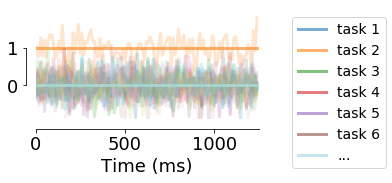

In [83]:
#Task Set

fig, ax3 = plt.subplots(1,1,figsize=(4,2.),gridspec_kw={'hspace': 0, 'wspace': 0})

cmap=plt.get_cmap('tab20')
task_n = 0
for l in range(20):
    plt.plot(range(0,np.shape(trial_n.x)[0]*10,10),trial_n.x[:,t,stim_in+l+1], alpha = a/3, linewidth = lw,c = cmap(l/20))#,c = cmap(l/20)
    if (l%2)==0:
        if l<12:
            task_n+=1
            print(l)
            plt.plot(range(0,np.shape(trial_f.x)[0]*10,10),trial_f.x[:,t,stim_in+l+1], alpha = a, linewidth = lw,c = cmap(l/20),label = 'task '+ str(int(task_n)))#,c = cmap(l/20)
    elif l==19:
        plt.plot(range(0,np.shape(trial_f.x)[0]*10,10),trial_f.x[:,t,stim_in+l+1], alpha = a, linewidth = lw,c = cmap(l/20),label = '...')#,c = cmap(l/20)
    else:
        plt.plot(range(0,np.shape(trial_f.x)[0]*10,10),trial_f.x[:,t,stim_in+l+1], alpha = a, linewidth = lw,c = cmap(l/20))#,c = cmap(l/20)

    # plt.legend(('Task1 (1-Hot)', 'Task2', 'Task3', '...'),bbox_to_anchor=(-.2, 1),
#           frameon=False,handlelength=1)
plt.xlabel('Time (ms)')
# plt.title(' : Rule Input')
ax3.spines["top"].set_visible(False)  
ax3.spines["right"].set_visible(False) 
#     ax3.spines["left"].set_visible(False) 
# plot_epoch_division_nolabel(trial_f)
plt.ylim(-.9,2)
plt.yticks((0,1))


ax3.spines['left'].set_position(('outward', 10))
ax3.spines['bottom'].set_position(('outward', 10))

ax3.spines['left'].set_bounds(0, 1)
ax3.set_xlim([0,t_len])        

ax3.spines['bottom'].set_bounds(0, t_len)
plt.legend(fontsize = 14, bbox_to_anchor=(1.6,1), loc="upper right")


figpath = os.path.join(p_figpath,'noise_'+str(n))
figname = 'rule_' +rule+'.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname),bbox_inches='tight')

plt.show()

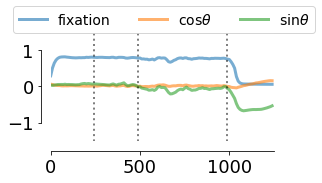

In [20]:
fig, ax = plt.subplots(1,1,figsize=(4,2.),gridspec_kw={'hspace': 0, 'wspace': 0})
plt.plot(range(0,np.shape(trial_f.x)[0]*10,10),y_hat[:,t,:],alpha = a, linewidth = lw)
# plt.plot(trial.y[:,t,:])
plt.legend(('fixation',r'$\cos{\theta}$',r'$\sin{\theta}$'), bbox_to_anchor=(-.2,1.3), loc="upper left",fontsize = 14,ncol = 3)
# plt.title('Output Unit Activations')

plt.ylim((-1.1,1.1))
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

ax.spines['left'].set_bounds(-1, 1)
ax.set_xlim([0,t_len])        

ax.spines['bottom'].set_bounds(0, t_len)

plot_epoch_division_nolabel(trial_f)
plt.ylim(-1.5,1.5)

figpath = os.path.join(p_figpath,'noise_'+str(n))
figname = 'output_' + rule+'.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname),bbox_inches='tight')

plt.show()

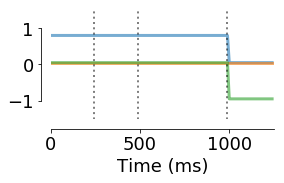

In [21]:

fig, ax = plt.subplots(1,1,figsize=(4,2.),gridspec_kw={'hspace': 0, 'wspace': 0})
plt.plot(range(0,np.shape(trial_f.y)[0]*10,10),trial_f.y[:,t,:],alpha = a, linewidth = lw)
# plt.plot(trial.y[:,t,:])
#     plt.xlabel('Time (ms)')
# plt.legend(('Fixation','cos ${\Theta}$','sin ${\Theta}$'),bbox_to_anchor=(1.05, 1), 
#            frameon=False,handlelength=1)
# plt.title('Target Ouput Activations')

plt.xlabel('Time (ms)')
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
# ax.spines["left"].set_visible(False) 
# ax.spines["bottom"].set_visible(False) 

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

ax.spines['left'].set_bounds(-1, 1)
ax.set_xlim([0,t_len])        

ax.spines['bottom'].set_bounds(0, t_len)

plot_epoch_division_nolabel(trial_f)
plt.ylim(-1.5,1.5)
# plt.yticks([])
# plt.xticks([])

figpath = os.path.join(p_figpath,'noise_'+str(n))
figname = 'targets_'+rule+'.pdf'
if not os.path.exists(figpath):
    os.makedirs(figpath)
plt.savefig(os.path.join(figpath,figname),bbox_inches='tight')

plt.show()

In [5]:
figpath

'/Users/lauradriscoll/Documents/code/overleaf/task_schematic_multitask/single_tasks/noise_True'